# 1.0 Libraries & Dependencies 

In [1]:
#installing dependencies for deepnote
!pip install xlrd
!pip install openpyxl
!pip install pandas plotly
!pip install wget 
!pip install fuzzywuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 25.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 43.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=5f1887c99d1355f07512f26c459fe4850fb927aee5640e49f044a0bfe083a7cf
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] 

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from PIL import Image
from io import BytesIO
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from IPython.display import display
from fuzzywuzzy import fuzz, process
from tabulate import tabulate  # Import the tabulate library
import plotly.graph_objects as go
import wget

dead_stock_bool=False

/root/venv/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Download the NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Arham's Code block



# 2.0 Notes For Employee Section Of ChatBot

## 2.1 Data Collections:

1. Item list - anonymized nike dataset used from previous job, redrafted with focus on Canadian market
2. Store List - Canadian Outlets (2019) using sources from citation list
2. Transactional Data - anonymized nike dataset used from previous job, redrafted with focus on Canadian market
3. Stock, Profits, leading time, backorder and dumpstock industry averages

## 2.2 Assumptions:

1. 16% profit margins [2], i.e. selling price without sale - cost of making the product 

## 2.3 Sources Referred:

1. https://d3.harvard.edu/platform-digit/submission/zara-achieving-the-fast-in-fast-fashion-through-analytics/
2. https://link.springer.com/chapter/10.1007/978-3-319-10912-1_221#:~:text=For%20example%2C%20profit%20margins%20for,higher%20for%20fast%20fashion%20retailers.

## 2.4 Features:

1. Top Dumpstock products to be consolidated & recommended strategies, Bottom Dumpstock & savings levers
2. Top products & Bottom products & categories by KPIs
3. Breakdown by stores, state, city to isolate the business phenomenon

## 2.5 Employee Functions

### 
2.5.1. Importing Datasets

In [5]:
# importing datasets from public link on github
dataset_url = "https://github.com/arhamkun/ZaraChatbot/raw/a2130a78683b1da29e1815bb2f0ea8b4b80c0168/SupportingExcel1.xlsx"

#dataset1 transactional data
transactions = pd.read_excel(dataset_url, sheet_name='TransactionalData')

#dataset2 sku level data
products = pd.read_excel(dataset_url, sheet_name='productIDs')


### 2.5.2. Important Function Definitions

In [6]:
## Employee - section A

# Function to display images and details
def display_product_info2(row, ax):
    response = requests.get(row['Zaraimg'])
    img = Image.open(BytesIO(response.content))

    ax.imshow(img)
    ax.set_title(f"{row['productName']}\nPrice: ${row['SellingPrice']}\nSold: {row['Sold']}/{row['Production']}",fontsize = 20)
    ax.axis('off')

# Top Products by Selling Price
def topProdBySP(p):
    products = p
    top_5_products = products.nlargest(5, 'SellingPrice')
    fig, axes = plt.subplots(1, len(top_5_products), figsize=(20, 8))  # Creating subplots

    for ax, (x, row) in zip(axes, top_5_products.iterrows()):
        display_product_info2(row, ax)

    plt.tight_layout()
    plt.show()
    
# Bottom Products by Selling Price
def bottomProdBySP(p):
    products = p
    top_5_products = products.nlargest(5, 'SellingPrice')
    fig, axes = plt.subplots(1, len(top_5_products), figsize=(20, 8))  # Creating subplots

    for ax, (x, row) in zip(axes, top_5_products.iterrows()):
        display_product_info2(row, ax)

    plt.tight_layout()
    plt.show()

    #
def topProdByDS(p):
    products = p
    top_5_products = products.nlargest(5, 'DeadStock Ratio')
    fig, axes = plt.subplots(1, len(top_5_products), figsize=(20, 8))  # Creating subplots

    for ax, (x, row) in zip(axes, top_5_products.iterrows()):
        display_product_info2(row, ax)

    plt.tight_layout()
    plt.show()
    
def bottomProdByDS(p):
    products = p
    top_5_products = products.nsmallest(5, 'DeadStock Ratio')
    fig, axes = plt.subplots(1, len(top_5_products), figsize=(20, 8))  # Creating subplots

    for ax, (x, row) in zip(axes, top_5_products.iterrows()):
        display_product_info2(row, ax)

    plt.tight_layout()
    plt.show()

    
## Employee - Section B

def citybreakdown(transactions_data):
    # Create a pandas DataFrame from the data
    transactions = pd.DataFrame(transactions_data)

    # Group data by city and calculate the total profit for each city
    city_summary = transactions.groupby('City')['Profits'].sum().reset_index()

    # Sort cities in descending order of contribution
    city_summary = city_summary.sort_values(by='Profits', ascending=False)

    # Calculate the total profit
    total_profit = city_summary['Profits'].sum()

    # Create a waterfall chart using Plotly
    fig = go.Figure()

    # Adding bars for each city's profit
    fig.add_trace(go.Waterfall(
        name='Contribution',
        x=city_summary['City'],
        textposition="outside",
        texttemplate='%{y:.0f}',  # Format text with 2 decimal points
        y=city_summary['Profits'],
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    ))

    # Adding a total bar disconnected from other bars
    fig.add_trace(go.Waterfall(
        name='Total',
        x=["Total"],
        textposition="outside",
        texttemplate='%{y:.0f}',  # Format text with 2 decimal points
        y=[total_profit],
        base=0,  # Starting from 0 on y-axis
        connector={"line": {"color": "rgb(63, 63, 63)"}},
    ))

    # Update the layout to make it more presentable
    fig.update_layout(
        title="Waterfall Chart: City Profits Contribution",
        xaxis_title="City",
        yaxis_title="Profits",
        showlegend=True,
    )

    # Show the waterfall chart
    fig.show()


## Employee - Section C


#store Analysis

def storeAnalysis(transactions):
    
    # Group transactions by StoreID and aggregate sales, profits, and other metrics
    store_stats = transactions.groupby(['StoreName','StoreID']).agg(
        TotalSales=('Product_Price', 'sum'),
        TotalProfits=('Profits', 'sum'),
        UnitsSold=('TransactionID', 'count')
    ).reset_index()

    # Sort the store_stats DataFrame by TotalSales in descending order
    store_stats = store_stats.sort_values(by='TotalSales', ascending=False)

    # Find the store with the highest sale
    highest_sale_store = store_stats.loc[store_stats['UnitsSold'].idxmax()]

    # Find the store with the lowest sale
    lowest_sale_store = store_stats.loc[store_stats['TotalSales'].idxmin()]

    # Print the results
    print(f"Total Number of stores: {len(store_stats)}\n\n")
    
    print(f"\nStore with highest sale is store number {highest_sale_store['StoreID']} i.e, {highest_sale_store['StoreName']}"
          f"""\nRecommendation: 
          1. Maximize Top Sellers: Ensure high-demand products are well-stocked.
          2. Streamline Checkout: Expedite checkout process for seamless shopping.
          3. Community Events: Host events to engage and strengthen customer relationships.\n""")
    
    print(f"\nStore with lowest sale is store number {lowest_sale_store['StoreID']} i.e., {lowest_sale_store['StoreName']}"
          f"""\nRecommendation: 
          1. Trim Excess Stock: Reduce overstocked items.
          2. Promote Slow Sellers: Offer discounts on stagnant products.
          3. Forecast Demand Accurately: Improve inventory prediction.\n""")
    
    print(tabulate(store_stats, headers='keys', tablefmt='pretty', numalign='right'))


    
## Employee Admin Access

# Code block defines a function to check if the user is employee and returns true and false based on whether 
# the user is employee or not

# empkey to check whether the user is an employee or not
empkey = {'EMP1':'PASSWORD',
          'EMP2':'PASSWORD',
          'EMP3':'PASSWORD',
          'EMP4':'PASSWORD',
          'EMP5':'PASSWORD',
          'EMP6':'PASSWORD',
          'EMP7':'PASSWORD',
          'EMP8':'PASSWORD',
          'EMP9':'PASSWORD',
          'EMP10':'PASSWORD'
         }


# fn to check if the user is employee
def check_ifemployee():
    empkey = {
        'EMP1': 'PASSWORD',
        'EMP2': 'PASSWORD',
        'EMP3': 'PASSWORD',
        'EMP4': 'PASSWORD',
        'EMP5': 'PASSWORD',
        'EMP6': 'PASSWORD',
        'EMP7': 'PASSWORD',
        'EMP8': 'PASSWORD',
        'EMP9': 'PASSWORD',
        'EMP10': 'PASSWORD'
    }

    employee_code = input("Zara: Enter your employee code: \nUSER:")
    password = input("Zara: Enter your password: \nUSER:")

    if employee_code in empkey and password == empkey[employee_code]:
        print("Authentication successful. You are logged in as", employee_code)
        # Continue with further actions for authenticated employee
        return True
    else:
        print("Authentication failed. Access denied.")
        return False

# to Call the function
# check_ifemployee()



### 2.5.3 Functions for Employee Menu

In [7]:


# functions for employee input categorization

# function A for deadstock
def function_A():
    print("Zara: Welcome! I'm here to provide information about deadstock.\n")
    
    while True:
        print("What would you like to know?")
        print("1. Top products with highest deadstock")
        print("2. Products with lowest deadstock")
        print("3. Products with highest sales")
        print("4. Products with lowest sales")
        print("0. Exit\n")
        
        user_input = input("Zara: Please enter your choice: \nUSER:")
        
        products = pd.read_excel(dataset_url, sheet_name='productIDs')
        if user_input == '1':
            topProdByDS(products)
        elif user_input == '2':
            bottomProdByDS(products)
        elif user_input == '3':
            topProdBySP(products)
        elif user_input == '4':
            bottomProdBySP(products)
        elif user_input == '0':
            print("Exiting the program. Goodbye!")
            break
        else:
            print("\nInput not recognized, please try again.\n")
            continue
        
        while True:
            tempx = input("\nDo you want to continue (yes/no)? ").lower()
            if tempx == 'yes':
                break
            elif tempx == 'no':
                print("Exiting the program. Goodbye!")
                return
            else:
                print("Please enter 'yes' to continue or 'no' to exit.")

            
                
#function B for 
def function_B():
    citybreakdown(transactions)


# function c for store analysis
def function_C():
    storeAnalysis(transactions)

    

dataset_url = "https://github.com/arhamkun/ZaraChatbot/raw/a2130a78683b1da29e1815bb2f0ea8b4b80c0168/SupportingExcel1.xlsx"

def employee_menu():
     if check_ifemployee() == True:
        while True:
            print("\nZARA: Select a category:")
            print("1. Deadstock Analysis")
            print("2. City Breakdown")
            print("3. Store Analysis")
            print("4. View Influencer Insights") # keep this for arnav
            print("5. Turn on Dead Stock Push")
            print("0. Exit\n\n")

            user_choice = input("Zara: Please enter your choice \nUSER: ")

            if user_choice == '1':
                function_A()
            elif user_choice == '2':
                function_B()
            elif user_choice == '3':
                function_C()
            elif user_choice == '4':
                colab_insights()
            elif user_choice == '5':
                print("Dead stock Push is now on")
                dead_stock_bool=True
                break
            elif user_choice == '0':
                print("Exiting. Goodbye!")
                break
            else:
                print("\nInvalid choice. Please select a valid option.\n")



# Logo function:

def addlogo():
    # Provide the URL to the image
    image_url = "https://i.pinimg.com/originals/5f/f8/aa/5ff8aa286413e2b47204efc3dae0a8f3.jpg"

    # Fetch the image from the URL
    response = requests.get(image_url)
    img_data = BytesIO(response.content)

    # Open the image
    img = Image.open(img_data)

    # Get the dimensions of the original image
    width, height = img.size

    # Calculate the new dimensions after cropping 1/3 from top and bottom
    new_height = int(height * (1 - 1/3 * 2))

    # Calculate cropping box (left, upper, right, lower)
    crop_box = (0, int(height * 1/3), width, int(height * 2/3))

    # Crop the image
    cropped_img = img.crop(crop_box)

    # Display the cropped image
    cropped_img.show()

# 3.0 Influencer collaboration (Customer)

The code below defines an "Influencer Collaboration" function that reads influencer data from a CSV file. It prompts the user for their Instagram name, checks their influence score, and determines the current season based on their country. If the score is high enough and a collaboration suggestion exists for the season, it prints a personalized collaboration message. The code provides error handling for data loading and extraction, and it relies on a get_season() function for determining the season.

In [8]:
def influencer_collaboration():
    print("Influencer Collaboration:")
    
    # Read data from "insta_data.csv" using pandas
    try:
        influencer_data = pd.read_csv("insta_data.csv")
    except FileNotFoundError:
        print("Error: Could not find 'insta_data.csv'. Make sure the file is in the same directory.")

    #print("Influencer data loaded successfully.")

    instagram_name = input("Zara: Enter your Instagram name: \nUSER:")
    print(f"Hi {instagram_name}, lets see if we have some options based on your profile."  )
    user_influence = influencer_data[influencer_data["channel_info"] == instagram_name]

    score = int(user_influence["influence_score"])
    
    if user_influence.empty:
        print(f"Sorry, {instagram_name} not found in the influencer data.")
        return
    
    influence_score = int(user_influence["influence_score"].values[0])
    country=user_influence["country"].values[0]
      
    
    if influence_score>70:
    
        season = get_season(country)
        if season:
            collaboration_options = {
                "summer": "Share your creation on Instagram with the hashtag #SummerVibesChallenge\n and tag @ZaraFashionBot.\n Don't forget to mention why your outfit represents the perfect summer vibe.",
                "winter": "Show off your winter style! Use the hashtag #WinterFashionGlow \n and mention @ZaraFashionBot to join our winter fashion campaign.",
                "spring": "Spring into fashion! Tag @ZaraFashionBot in your spring-themed outfit post \n with the hashtag #SpringFreshLooks.",
                "fall": "Fall in love with fashion! Share your fall outfit using #FallFashionFaves \n and tag @ZaraFashionBot to be featured."
            }
            
            if season in collaboration_options:
                print(f"Congrats I see you qualify for our collaboration program. I see the season in {country} is currently {season}")
                
                print("Here is what you can do!:")
                print(collaboration_options[season])
            else:
                print("No collaboration suggestion available for this season.")

The get_season(country) function uses web scraping to determine the current season in a given country based on the temperature. It sends a Google search query for the country's weather, extracts temperature data from the response, and maps it to seasons. The function returns the corresponding season (winter, spring, fall, or summer) based on predefined temperature ranges. Error handling is included for potential issues during the web scraping process.

In [9]:
def get_season(country):
    # Search for season information on Google
    search_query = f"current weather in {country}"
    search_url = f"https://www.google.com/search?q={search_query}"
    
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    
    response = requests.get(search_url, headers=headers)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        result = soup.find("div", class_="BNeawe iBp4i AP7Wnd")
        
        if result:
            temperature = (result.get_text().lower())
            temperature = int(temperature.split('°')[0])
            if temperature < 10:
                season = "winter"
            elif 10 <= temperature < 15:
                season = "spring"
            elif 15 <= temperature < 20:
                season = "fall"
            else:
                season = "summer"
            return season
        else:
            print("Could not retrieve season information from Google.")
            return None
    else:
        print("Error: Unable to connect to Google.")
        return None

# 4.0 Influencer Insights (Employee)

The colab_insights() function offers a menu to explore influencer collaboration insights. It allows users to choose from options: view the top 10 influencers by brand sentiment, visualize a correlation heatmap between specific influencer metrics, or exit the menu. The function reads influencer data from "insta_data.csv," extracting sentiment scores and influencer metrics for analysis and visualization. It utilizes libraries like pandas, matplotlib, and seaborn for data processing and visualization. Error handling is included to address potential file and column absence issues in the data.

In [10]:
def colab_insights():
    while True:
        print("Welcome, what would you like to view?")
        print("1. View Top 10 Influencer by Brand Sentiment")
        print("2. View Correlation HeatMap")
        print("3. Exit")
        choice = input("Zara: Enter your choice (1/2/3: \nUSER:")

        if choice == "1":
            
            try:
                influencer_data = pd.read_csv("insta_data.csv")
            except FileNotFoundError:
                print("Error: Could not find 'insta_data.csv'. Make sure the file is in the same directory.")
                return
            try:
                sentiment_data = influencer_data[["channel_info", "Sentiment score"]]
                sorted_data = sentiment_data.sort_values(by="Sentiment score", ascending=False).head(20)
                
                names = sorted_data["channel_info"].values[::-1]  # Reverse the order of names
                scores = sorted_data["Sentiment score"].values[::-1]  # Reverse the order of scores
                
                plt.figure(figsize=(10, 8))
                plt.barh(names, scores, color='blue')
                plt.xlabel("Sentiment Score")
                plt.ylabel("Influencer Names")
                plt.title("Top 20 Collaboration Sentiment Insights")
                plt.tight_layout()
                plt.show()
            except KeyError:
                print("Error: 'Sentiment score' column not found in influencer data.")
                
                
        elif choice=="2":
            influencer_data = pd.read_csv("insta_data.csv")
            columns_to_plot = ["influence_score", "posts", "followers", "avg_likes", "60_day_eng_rate", "new_post_avg_like", "total_likes", "Sentiment score"]

            # Create a correlation matrix
            correlation_matrix = influencer_data[columns_to_plot].corr()

            # Set up the heatmap using Seaborn
            plt.figure(figsize=(10, 8))
            sns.heatmap(influencer_data.corr(), cbar=True, linewidths=0.5)
            plt.title("Correlation Heatmap")
            plt.show()
            
        elif choice == "3":
            print("Exiting")
            break

### 5.0Hot Item Recommendation

**trendy_item_recommendation Function:**
- This function provides recommendations for trendy clothing items based on user preferences.
- It prompts the user for their preferred category, color, size, and price range for clothing items.
- Returns the user's input as individual preference variables.
- It takes user preferences as input arguments: category, color, size, and price preference.
- Filters the dataframe (presumably containing clothing item data) based on user preferences.
- Sorts the filtered items by popularity and trendiness scores in descending order.
- Recommends the top-rated item to the user, considering popularity and trendiness scores.
- Displays the recommended item's name, brand, description, price, category, and URL.
- Handles cases where no suitable items are found.

**Example Usage:**
- The code uses the `get_user_preferences` function to collect user preferences for clothing items.
- It then employs the `trendy_item_recommendation` function to provide a recommendation based on the user's input preferences.
- If a suitable item is found, it displays the details of the recommended item along with its URL.
- If no matching items are found, it notifies the user.

These functions work together to create an interactive experience where users provide their preferences, and the program offers recommendations based on those preferences.

In [11]:

def trendy_item_recommendation(df):

    print("Let's get started! Please provide your preferences:")

        # Gather available colors, sizes, and price ranges
    available_colors = df['color'].unique()
    available_sizes = df['size'].unique()
    available_price_range = df['price_category'].unique().tolist()

        # Collect user preferences
    user_color_preference = input(f"Zara: Available colors: {', '.join(available_colors)}. What's your preferred color? \nUSER:").upper()
    user_size_preference = input(f"Zara: Available sizes: {', '.join(available_sizes)}. What's your preferred size? \nUSER:").upper()
    print('Price Range: low: < $40, medium: < $80, high < $120, luxury +$120')
    user_price_preference = input(f"Zara: Available price range: {', '.join(available_price_range)}. What's your preferred price range? \nUSER:").upper()
    
    # Display a welcome message
    print("Thank you for providing your preference! Let's find you some trendy items that match your preferences.")
    
    # Filter items based on user preferences
    filtered_items = df[
        (df['color'] == user_color_preference) &
        (df['size'] == user_size_preference) &
        (df['price_category'] <= user_price_preference) &
        (df['availability'] == 'InStock')
    ]

    # Check if there are matching items
    if len(filtered_items) > 0:
        # Sort the filtered items by popularity and trendiness scores
        sorted_items = filtered_items.sort_values(by=['popularity_score', 'trendiness_score'], ascending=[False, False])
        
        # Check if sorted_items is not empty
        if len(sorted_items) > 0:
            # Get the details of the recommended item
            recommended_item = sorted_items.iloc[0]
            
            # Display the recommendation details
            print(f"I recommend '{recommended_item['name']}' by {recommended_item['brand']}!")
            print(f"Description: {recommended_item['description']}")
            print(f"Price: ${recommended_item['price']}")
            print(f"Category: {recommended_item['category']}")
            print(f"You can check it out [here]({recommended_item['url']}).")
        else:
            print("I'm sorry, I couldn't find any trendy items matching your preferences.")
    else:
        print("I'm sorry, I couldn't find any items matching your preferences.")


### 6.0 Event Based Recommendation

**match_event Function:**
- Compares the input event with a predefined list of event categories.
- Uses fuzzy string matching to find the best-matched event category.
- Returns the matched event category and a matching score.

**filter_recommendations Function:**
- Filters recommended items based on user preferences for color, size, and price category.
- Takes recommended_items DataFrame and user preferences as inputs.
- Returns a DataFrame containing filtered items.

**find_complimentary_items Function:**
- Finds items that complement the recommended item.
- Takes clothing_data, recommended_item, matched_event, user_color_preference, and user_size_preference as inputs.
- Returns a DataFrame containing complementary items based on specified criteria.

**event_based_recommendation Function:**
- Guides the user through finding an outfit for a specific event.
- Takes an event and clothing_data as inputs.
- Uses fuzzy string matching to find a matching event category.
- Displays a welcome message and event category based on the match.
- Prompts the user for color, size, and price range preferences.
- Filters recommendations based on user preferences and event category.
- Provides recommendations and, if available, complementary item details.

These functions work together to provide a conversational and interactive experience for users, guiding them to find the perfect outfit for a specific event based on their preferences. The recommendations are displayed in a structured format with relevant information.

In [12]:
def match_event(event):
    # List of event categories
    event_lists = [
        "Casual and Everyday Wear",
        "Formal and Business Events",
        "Evening and Party Wear",
        "Beach and Vacation",
        "Athletic and Workout",
        "Sleep and Loungewear",
        "Winter and Cold Weather",
        "Summer and Hot Weather",
        "Festive and Holiday Wear",
    ]
    # Find the best-matched event category
    matched_event, score = process.extractOne(
        event.lower(), event_lists, scorer=fuzz.partial_ratio
    )
    return matched_event, score


In [13]:
def filter_recommendations(recommended_items, user_color_preference, user_size_preference, user_price_preference):
    # Filter recommended items based on user preferences
    filtered_items = recommended_items[
        (recommended_items['color'] == user_color_preference) &
        (recommended_items['size'] == user_size_preference) &
        (recommended_items['price_category'] == user_price_preference)
    ]
    return filtered_items

In [14]:
def find_complimentary_items(clothing_data, recommended_item, matched_event, user_color_preference, user_size_preference):
    # Find items that complement the recommended item
    recommended_category = recommended_item['category'].item()
    complimentary_category = recommended_item['complimentary_clothing_category'].item()

    complimentary_items = clothing_data[
        (clothing_data['category'] == complimentary_category) &
        (clothing_data['event_category'] == matched_event) &
        (clothing_data['color'] == user_color_preference) &
        (clothing_data['size'] == user_size_preference) &
        (clothing_data['availability'] == 'InStock')
    ]
    return complimentary_items

In [15]:
def event_based_recommendation(event, clothing_data):
    # Introduction message
    print("Hello there! Let's find the perfect outfit for your event.")
    
    # Match the input event to the closest event category
    matched_event, score = match_event(event)

    # Check if the match score is sufficient
    if score >= 70:
        # Display matched event category
        print(f"Great! It looks like you're attending a '{matched_event}' event.")
        
        # Filter recommended items for the matched event and availability
        recommended_items = clothing_data[clothing_data['event_category'] == matched_event]
        recommended_items = recommended_items[recommended_items['availability'] == 'InStock']

        # Gather available colors, sizes, and price ranges
        available_colors = recommended_items['color'].unique()
        available_sizes = recommended_items['size'].unique()
        available_price_range = recommended_items['price_category'].unique().tolist()

        # Collect user preferences
        user_color_preference = input(f"Zara: Available colors: {', '.join(available_colors)}. What's your preferred color? \nUSER:").upper()
        user_size_preference = input(f"Zara: Available sizes: {', '.join(available_sizes)}. What's your preferred size? \nUSER:").upper()
        print('Price Range: low: < $40, medium: < $80, high < $120, luxury +$120')
        user_price_preference = input(f"Zara: Available price range: {', '.join(available_price_range)}. What's your preferred price range? \nUSER:").upper()

        # Filter recommended items based on user preferences
        recommended_items = filter_recommendations(recommended_items, user_color_preference, user_size_preference, user_price_preference)

        if len(recommended_items) > 0:
            # Get a recommended item
            recommended_item = recommended_items.sample(n=1)
            
            # Find a complementary item
            complimentary_item = find_complimentary_items(clothing_data, recommended_item, matched_event, user_color_preference, user_size_preference)

            if len(complimentary_item) >= 1:
                # Display recommendation and complementary item details
                print('Here is our recommendation:')
                print(f"Name: {recommended_item['name'].values[0]}")
                print(f"Size: {recommended_item['size'].values[0]}")
                print(f"Color: {recommended_item['color'].values[0]}")
                print(f"Price: {recommended_item['price'].values[0]}")
                print(f"URL: {recommended_item['url'].values[0]}")
                
                print('\nYou might also be interested in this:')
                print(f"Name: {complimentary_item['name'].values[0]}")
                print(f"Size: {complimentary_item['size'].values[0]}")
                print(f"Color: {complimentary_item['color'].values[0]}")
                print(f"Price: {complimentary_item['price'].values[0]}")
                print(f"URL: {complimentary_item['url'].values[0]}")
            else:
                # Display only recommendation details when no complementary item is found
                print('Here is our recommendation:')
                print(f"Name: {recommended_item['name'].values[0]}")
                print(f"Size: {recommended_item['size'].values[0]}")
                print(f"Color: {recommended_item['color'].values[0]}")
                print(f"Price: {recommended_item['price'].values[0]}")
                print(f"URL: {recommended_item['url'].values[0]}")
                
        else: 
            # No suitable recommendations found
            print("I'm sorry, I couldn't find suitable recommendations for that event with your preferences.")
    else:
        # No suitable event match found
        print("I'm sorry, I couldn't find suitable recommendations for that event.")

# 7.0 Customer Menu

The customer_menu() function provides the main customer options. 

Customers can select from options like viewing hot items, receiving event-based clothing recommendations, exploring influencer collaboration suggestions, or exiting the menu. The function reads clothing data from a CSV file, and depending on the selected option, it calls specific functions like trendy_item_recommendation() and event_based_recommendation() to provide insights and recommendations. 

In [16]:
def customer_menu(): 
    while True:
        print("Welcome, Customer! What would you like help with today?") 
        print("1. Hot items")
        print("2. Event Based Reccommendations")
        print("3. Influencer Collaboration")
        print("4. Exit")
        choice = input("Zara: Enter your choice (1/2/3/4): \nUSER:")
        
        if choice == "1":
            clothing_data = pd.read_csv('ZaraData.csv')
            if dead_stock_bool == True: 
                print('\ndeadstock push in on **this is just for us to see the code is working\n')
                clothing_data['availability'] = clothing_data['deadstock'] 

            trendy_item_recommendation(df=clothing_data)            
        elif choice == "2":
            clothing_data = pd.read_csv('ZaraData.csv')
            if dead_stock_bool == True:
                print('\ndeadstock push in on **this is just for us to see the code is working\n')
                clothing_data['availability'] = clothing_data['deadstock']
                
            event = input("Hello! What's the occasion you're dressing up for? ")
            event_based_recommendation(event, clothing_data)
        elif choice == "3":
            influencer_collaboration()
        elif choice == "4":
            print("Exiting customer menu.")
            break
        else:
            print("Invalid choice.")

# 8.0 Main Function

The code snippet defines the main() function, which serves as the entry point for the program. It sets up an infinite loop that continues until the user decides to exit. Within the loop, the chatbot displays a welcome message and prompts the user to choose their role:

Employee: If the user selects this option, the program calls the employee_menu() function. This function will contain a menu tailored to employee interactions.

Customer: If the user chooses this option, the program calls the customer_menu() function. This function will contain a menu tailored to customer interactions.

Exit: If the user decides to exit, the program displays a farewell message and terminates the loop.

/tmp/ipykernel_262/2103565695.py:4: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('clear')


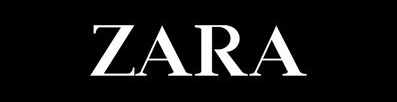

Zara: Hi! Welcome to the Zara chatbot. Before we begin, please choose if you are an employee or customer.
1. Employee
2. Customer
3. Exit
Authentication successful. You are logged in as EMP1

ZARA: Select a category:
1. Deadstock Analysis
2. City Breakdown
3. Store Analysis
4. View Influencer Insights
5. Turn on Dead Stock Push
0. Exit





ZARA: Select a category:
1. Deadstock Analysis
2. City Breakdown
3. Store Analysis
4. View Influencer Insights
5. Turn on Dead Stock Push
0. Exit


Total Number of stores: 18



Store with highest sale is store number 4 i.e, ZARA OTTAWA - RIDEAU-LOCAL 303
Recommendation: 
          1. Maximize Top Sellers: Ensure high-demand products are well-stocked.
          2. Streamline Checkout: Expedite checkout process for seamless shopping.
          3. Community Events: Host events to engage and strengthen customer relationships.


Store with lowest sale is store number 9 i.e., ZARA QUEBEC - FAIRVIEW POINTE CLAIRE
Recommendation: 
          1. Trim Excess Stock: Reduce overstocked items.
          2. Promote Slow Sellers: Offer discounts on stagnant products.
          3. Forecast Demand Accurately: Improve inventory prediction.

+----+-------------------------------------------+---------+------------+--------------------+-----------+
|    |                 StoreName                 | StoreI

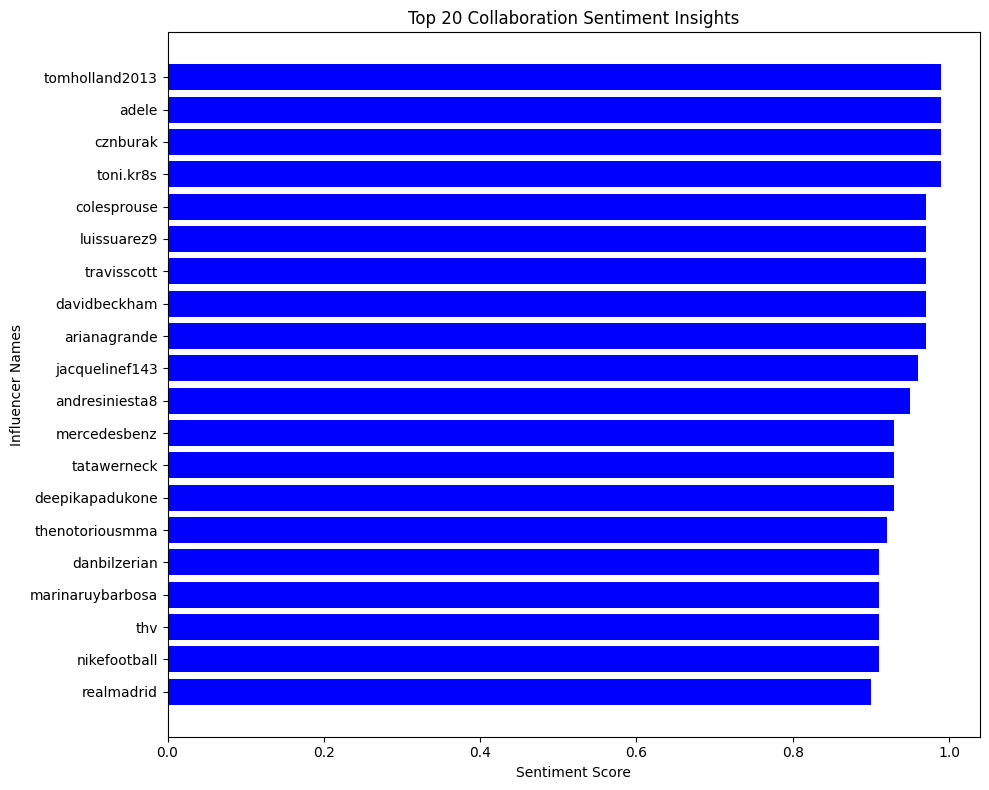

Welcome, what would you like to view?
1. View Top 10 Influencer by Brand Sentiment
2. View Correlation HeatMap
3. Exit


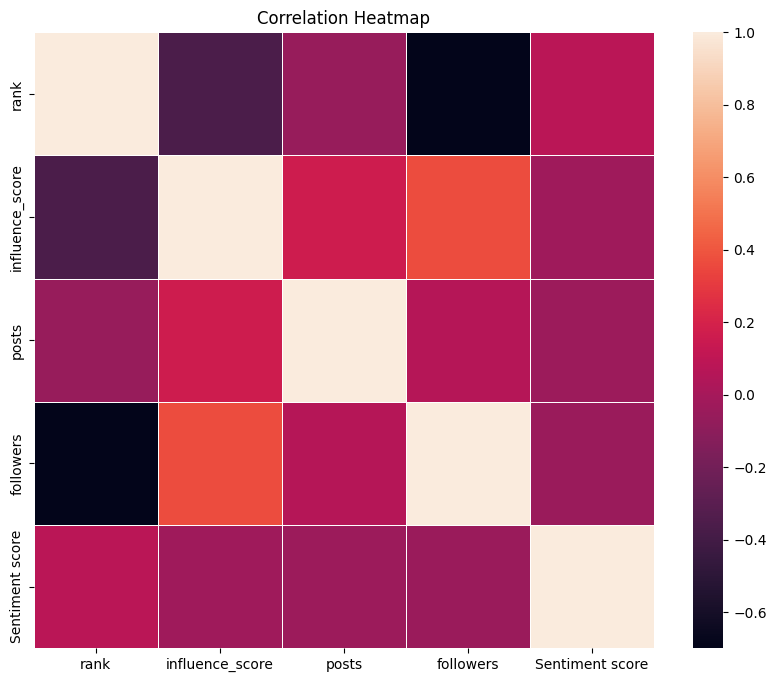

Welcome, what would you like to view?
1. View Top 10 Influencer by Brand Sentiment
2. View Correlation HeatMap
3. Exit
Exiting

ZARA: Select a category:
1. Deadstock Analysis
2. City Breakdown
3. Store Analysis
4. View Influencer Insights
5. Turn on Dead Stock Push
0. Exit


Dead stock Push is now on
Zara: Hi! Welcome to the Zara chatbot. Before we begin, please choose if you are an employee or customer.
1. Employee
2. Customer
3. Exit
Welcome, Customer! What would you like help with today?
1. Hot items
2. Event Based Reccommendations
3. Influencer Collaboration
4. Exit
Hello there! Let's find the perfect outfit for your event.
Great! It looks like you're attending a 'Casual and Everyday Wear' event.
Price Range: low: < $40, medium: < $80, high < $120, luxury +$120
Here is our recommendation:
Name: OTTOMAN PLUSH PANTS
Size: S
Color: BLUE
Price: 17
URL: https://www.zara.com/us/en/ottoman-plush-pants-p01880572.html
Welcome, Customer! What would you like help with today?
1. Hot items
2. E

In [ ]:

def main():
    #transactions = pd.read_excel(dataset_url, sheet_name='TransactionalData')
    #products = pd.read_excel(dataset_url, sheet_name='productIDs')
    get_ipython().magic('clear')
    addlogo()  
        
    while True:
        print("Zara: Hi! Welcome to the Zara chatbot. Before we begin, please choose if you are an employee or customer.")
        print("1. Employee")
        print("2. Customer")
        print("3. Exit")
        choice = input("Zara: Enter your choice (1/2/3): \nUSER:")

        if choice == "1":
            employee_menu()

        elif choice == "2":
            customer_menu() #function call

        elif choice == "3":
            print("Zara: Goodbye! Have a great day. \n")
            break
    
        else:
            print("Invalid choice. Please select '1' for Employee, '2' for Customer, or '3' to Exit.")

       
if __name__ == "__main__":
    main()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=efa188a0-2f94-4804-9f19-625dc30c6533' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>